In [1]:
import numpy as np
import pandas as pd
from typing import Optional, List
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
import sklearn.base

seed = 24

["The Ames Iowa Housing Data"](https://www.openml.org/d/41211)

In [3]:
data = pd.read_csv('./data.csv')

data.sample(20)

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
2590,One_Story_1945_and_Older,Residential_Low_Density,118,21299,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,12,2006,COD,Abnorml,167000,-93.615470,42.040276
452,One_Story_PUD_1946_and_Newer,Residential_Low_Density,34,5381,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,8,2009,WD,Normal,196000,-93.649743,42.059179
1904,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,50,5175,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,7,2007,COD,Normal,112000,-93.628582,42.036223
2360,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,71,9353,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,Shed,0,7,2006,Oth,Abnorml,116050,-93.625373,42.053459
840,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,112,10859,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,NaN,0,6,2009,WD,Normal,145000,-93.691585,42.018996
2312,Two_Story_1946_and_Newer,Residential_Low_Density,0,13041,Pave,No_Alley_Access,Moderately_Irregular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,2,2006,WD,Normal,170000,-93.637482,42.060425
1641,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,85,14082,Pave,No_Alley_Access,Slightly_Irregular,HLS,AllPub,Inside,...,No_Fence,NaN,0,1,2007,WD,Normal,441929,-93.628754,42.058998
964,Split_or_Multilevel,Residential_Low_Density,125,14419,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,NaN,0,7,2009,WD,Normal,213500,-93.644600,41.998166
22,Two_Story_1946_and_Newer,Floating_Village_Residential,0,7500,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,1,2010,WD,Normal,216000,-93.639366,42.049297
1717,One_Story_PUD_1946_and_Newer,Residential_Low_Density,34,3903,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,5,2007,WD,Normal,200000,-93.649808,42.059176


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MS_SubClass         2930 non-null   object 
 1   MS_Zoning           2930 non-null   object 
 2   Lot_Frontage        2930 non-null   int64  
 3   Lot_Area            2930 non-null   int64  
 4   Street              2930 non-null   object 
 5   Alley               2930 non-null   object 
 6   Lot_Shape           2930 non-null   object 
 7   Land_Contour        2930 non-null   object 
 8   Utilities           2930 non-null   object 
 9   Lot_Config          2930 non-null   object 
 10  Land_Slope          2930 non-null   object 
 11  Neighborhood        2930 non-null   object 
 12  Condition_1         2930 non-null   object 
 13  Condition_2         2930 non-null   object 
 14  Bldg_Type           2930 non-null   object 
 15  House_Style         2930 non-null   object 
 16  Overal

Разобьём данные на обучающую и тестовую выборки.

In [5]:
target_column = "Sale_Price"
np.random.seed(seed)

test_size = 0.2
data_train, data_test, Y_train, Y_test = train_test_split(
    data[data.columns.drop("Sale_Price")],
    np.array(data["Sale_Price"]),
    test_size=test_size,
    random_state=seed)

print(f"Train : {data_train.shape} {Y_train.shape}")
print(f"Test : {data_test.shape} {Y_test.shape}")

Train : (2344, 80) (2344,)
Test : (586, 80) (586,)


предобработка данных

In [9]:
continuous_columns = [key for key in data.keys() if data[key].dtype in ("int64", "float64")]
categorical_columns = [key for key in data.keys() if data[key].dtype == "object"]

continuous_columns.remove(target_column)

print(f"Continuous : {len(continuous_columns)}, Categorical : {len(categorical_columns)}")

Continuous : 34, Categorical : 46


feature engineering

In [10]:
from sklearn.base import TransformerMixin
from sklearn.preprocessing import StandardScaler
class SmartDataPreprocessor(TransformerMixin):
    def __init__(self, needed_columns: Optional[List[str]]=None):
        """
        :param needed_columns: if not None select these columns from the dataframe
        """
        self.scaler = StandardScaler()
        self.columns = needed_columns

    def fit(self, data, *args):
        """
        Prepares the class for future transformations
        :param data: pd.DataFrame with all available columns
        :return: self
        """
        self.scaler.fit(data[self.columns] if self.columns else data)
        return self

    def transform(self, data: pd.DataFrame) -> np.array:
        """
        Transforms features so that they can be fed into the regressors
        :param data: pd.DataFrame with all available columns
        :return: np.array with preprocessed features
        """
        res = data
        res.loc[res['Lot_Frontage'] == 0] = res['Lot_Frontage'].median()
        res = self.scaler.transform(data[self.columns] if self.columns else data)
        return res

In [11]:
preprocessor = SmartDataPreprocessor(needed_columns=continuous_columns)

X_train = preprocessor.fit_transform(data_train)
X_test = preprocessor.transform(data_test)
X_train

array([[ 0.72781797,  0.10999732,  0.65825008, ...,  0.91897402,
         1.59953221, -2.10399441],
       [ 0.28278084,  0.3792301 ,  1.09413674, ...,  1.67878887,
        -0.03026421,  1.46544646],
       [ 0.63881055, -0.1507842 , -0.4147017 , ..., -1.36047053,
         1.4104223 ,  0.21280896],
       ...,
       [ 0.52013398,  0.4287303 , -0.71646938, ..., -0.60065568,
         0.65006975, -0.71551757],
       [ 0.22344256,  0.09261189, -0.4147017 , ...,  0.91897402,
        -0.82561363, -0.89443458],
       [ 0.22344256, -0.36327285, -0.14646375, ...,  0.91897402,
         0.69254025,  0.78026581]])

### Линейная регрессия

Давайте получим базовое решение (бейзлайн), чтобы потом с ним можно было сравниваться.

In [12]:
X_train = pd.DataFrame(X_train, index=data_train.index, columns=continuous_columns)

In [13]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [14]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %code_wrap  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%code_wrap  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  

In [15]:
from sklearn import metrics



In [17]:
from sklearn.metrics import mean_squared_error, balanced_accuracy_score, mean_absolute_error
mean_absolute_error(Y_test, lr.predict(X_test))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28467.779514782822

In [18]:
l2r = Ridge()
l2r.fit(X_train, Y_train)

Ridge()

In [19]:
mean_absolute_error(Y_test, l2r.predict(X_test))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


28462.153914344795

В целом, регуляризация редко портит модель, но важно правильно подобрать коэффициент регуляризации.

### метрики

In [20]:
def root_mean_squared_logarithmic_error(y_true, y_pred, a_min=1.):
    y_pred[y_pred < a_min] = a_min
    return np.sqrt(((np.log(y_true) - np.log(y_pred)) ** 2).mean())

In [21]:
root_mean_squared_logarithmic_error(Y_test, l2r.predict(X_test))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


0.22566708642492903

### Логарифмирование таргета.

Вообще идея с логарифмированием таргета довольно хороша для этой задачи. Давайте посмотрим на распределение обычных и логарифмированных таргетов.

In [115]:
def plot_target_distribution(Y_train, Y_test, ax, n_bins=20):
    ax.hist(Y_train, bins=n_bins, label="train", color="red", alpha=0.3, density=True)
    ax.hist(Y_test, bins=n_bins, label="test", color="blue", alpha=0.3, density=True)

    ax.legend()
    ax.set_xlabel("Value")
    ax.set_ylabel("Probability")


def plot_both_distributions(Y_train, Y_test):
    fig, (ax0, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(15, 6))

    plot_target_distribution(Y_train, Y_test, ax=ax0)
    ax0.set_title("Standard")

    plot_target_distribution(np.log(Y_train), np.log(Y_test), ax=ax1)
    ax1.set_title("Logarithmic")

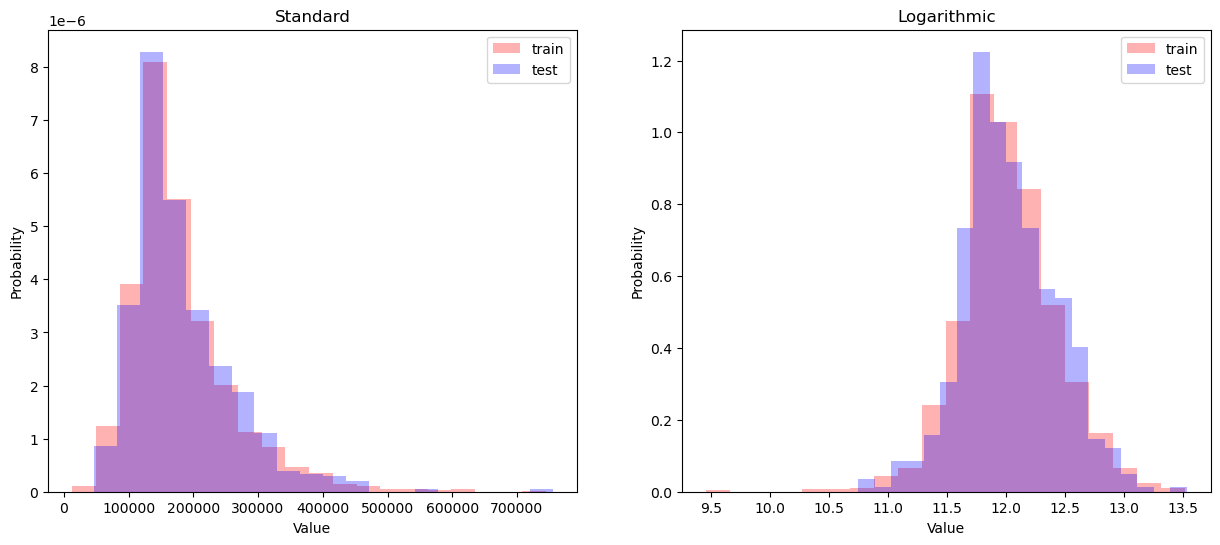

In [116]:
plot_both_distributions(Y_train, Y_test)

In [22]:
class ExponentialLinearRegression(Ridge):
    def init(self, alpha=1.0,fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None):
        super(ExponentialLinearRegression, self).__init__(alpha=alpha,fit_intercept=fit_intercept, copy_X=copy_X, max_iter=max_iter, tol=tol, solver=solver, positive=positive, random_state=random_state)
        
    def fit(self, X, Y):
        super(ExponentialLinearRegression, self).fit(X, np.log(Y))
        return self
    
    def predict(self, X):
        return np.exp(super(ExponentialLinearRegression, self).predict(X))

    def get_params(self, deep=True):
        return super(ExponentialLinearRegression, self).get_params(deep=deep)

    def set_params(self, **params):
        super(ExponentialLinearRegression, self).set_params(**params)

In [23]:
classic_regressor = Ridge()
exponential_regressor = ExponentialLinearRegression()

classic_regressor.fit(X_train, Y_train)
exponential_regressor.fit(X_train, Y_train)

classic_prediction = classic_regressor.predict(X_test)
exponential_prediction = exponential_regressor.predict(X_test)

print(f"MAE  : Classic : {mean_absolute_error(Y_test, classic_prediction)}  Exponential : {mean_absolute_error(Y_test, exponential_prediction)}")
print(f"MSLE : Classic : {root_mean_squared_logarithmic_error(Y_test, classic_prediction)} Exponential : {root_mean_squared_logarithmic_error(Y_test, exponential_prediction)}")

MAE  : Classic : 28462.153914344795  Exponential : 31923.355394442806
MSLE : Classic : 0.22566708642492903 Exponential : 0.24517851670539678


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but ExponentialLinearRegression was fitted with feature names
  warnings.warn(


In [24]:
X_all = np.concatenate([X_train, X_test])
Y_all = np.concatenate([Y_train, Y_test])


In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error as mae

clf = LinearRegression()
scores = cross_val_score(clf, X_all, Y_all, cv=KFold(n_splits=5, shuﬄe=True, random_state=42), scoring=sklearn.metrics.make_scorer(mae))
print(int(scores.mean()))

# MAE = mae(Y_all, clf.predict(X_all))
# print(MAE)

27888


In [26]:
classic_regressor = LinearRegression()

classic_regressor.fit(X_train, Y_train)

LinearRegression()

### Линейная модель своими руками



Линейная модель делает предсказание по такой формуле:
$$
\widehat{y}(x) = x^T \widehat{\theta}
$$
Здесь $\widehat{\theta}$ &mdash; обучаемые параметры, $x$ &mdash; вектор фичей данного примера.
Оценка $\widehat{\theta}$ находятся из задачи минимизации лосс функции:

$$
F(\theta) = \frac{1}{n} \sum_{i=1}^{n} \left(Y_i - x_i^T \theta\right)^2 + \lambda \theta^T\theta \longrightarrow \min_{\theta \in \mathbb{R}^d}
$$

In [179]:
from sklearn.base import RegressorMixin
import numpy as np
class SGDLinearRegressor(RegressorMixin):
    def __init__(
        self,
        lr=0.01,
        regularization=1.,
        delta_converged=1e-2,
        max_steps=1000,
        batch_size=64,
    ):
        self.lr = lr
        self.regularization = regularization
        self.max_steps = max_steps
        self.delta_converged = delta_converged
        self.batch_size = batch_size

        self.w = None
        self.b = None

    def fit(self, X, Y):
        self.w = np.random.random(X.shape[1])
        self.b = 1
        for i in range(self.max_steps):
            inds = np.random.choice(np.arange(X.shape[0]), size=self.batch_size, replace=False)
            X_batch = X[inds]
            Y_batch = Y[inds]
            y_pred = X_batch @ self.w + self.b
            err = y_pred - Y_batch
            grad_w = X_batch.T @ err / self.batch_size
            grad_bias = np.mean(err)
            self.w = self.w - self.lr * (grad_w + self.regularization * self.w)
            self.b = self.b - self.lr * grad_bias
        return self
        
    def predict(self, X):
        return X @ self.w + self.b

In [180]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((2344, 34), (2344,), (586, 34), (586,))

In [181]:
# Check yourself

model = SGDLinearRegressor()
model.fit(X_train, Y_train)

prediction = model.predict(X_test)
print(Y_test.shape, prediction.shape)
print("MAE : ", mean_absolute_error(Y_test, prediction))
print("Mean log : ", root_mean_squared_logarithmic_error(Y_test, prediction))

(586,) (586,)
MAE :  25539.459547668255
Mean log :  0.1896648829082611


### Категориальные признаки

В самом начале ноутбука мы отбросили категориальные фичи, хотя они могут помочь нам сделать модель лучше. 


In [211]:
from sklearn.preprocessing import OneHotEncoder

In [214]:
interesting_columns = ["Overall_Qual", "Garage_Qual", "Sale_Condition", "MS_Zoning"]

class OneHotPreprocessor(BaseDataPreprocessor):
    def __init__(self, **kwargs):
        super(OneHotPreprocessor, self).__init__(**kwargs)
        ## <YOUR CODE HERE>

    def fit(self, data):
        self.enc = OneHotEncoder(drop='first',sparse=False, handle_unknown="ignore")
        self.enc = self.enc.fit(data)
        return self

    def transform(self, data):
        return self.enc.transform(data)
    
    def cats(self):
        return self.enc.categories_

Обучим модель с добавленными категориальными фичами.

In [215]:
enc = OneHotPreprocessor()
train_cat = enc.fit_transform(data_train[interesting_columns])
train_cat

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [218]:
X_train_c = X_train.copy()
X_train_c = np.hstack([X_train_c, train_cat])

In [219]:
test_cat = enc.fit_transform(data_test[interesting_columns])
test_cat

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [220]:
X_test_c = X_test.copy()
X_test_c = np.hstack([X_test_c, test_cat])

### Pipeline

In [263]:
from sklearn.pipeline import Pipeline

In [371]:
from sklearn.base import TransformerMixin
from sklearn.preprocessing import StandardScaler

class BaseDataPreprocessor(TransformerMixin):
    def __init__(self, needed_columns: Optional[List[str]]=None):
        """
        :param needed_columns: if not None select these columns from the dataframe
        """
        self.scaler = StandardScaler()
        self.columns = needed_columns

    def fit(self, data, *args):
        """
        Prepares the class for future transformations
        :param data: pd.DataFrame with all available columns
        :return: self
        """
        self.scaler.fit(data[self.columns] if self.columns else data)
        return self

    def transform(self, data: pd.DataFrame) -> np.array:
        """
        Transforms features so that they can be fed into the regressors
        :param data: pd.DataFrame with all available columns
        :return: np.array with preprocessed features
        """
        # Your code here
        scaled_data = self.scaler.transform(data[self.columns])
        data[self.columns] = scaled_data
        return data


class OneHotPreprocessor(BaseDataPreprocessor):
    def __init__(self, intrest, **kwargs):
        super(OneHotPreprocessor, self).__init__(**kwargs)
        self.interesting_columns = intrest

    def fit(self, data, data_y):
        self.enc = OneHotEncoder(drop='first',sparse_output=False, handle_unknown="ignore")
        self.enc = self.enc.fit(data[self.interesting_columns])
        return self

    def transform(self, data):
        return np.hstack([data.drop(self.interesting_columns, axis=1), self.enc.transform(data[self.interesting_columns])])
    
    def cats(self):
        return self.enc.categories_
    

from sklearn.base import RegressorMixin
import numpy as np
class SGDLinearRegressor(RegressorMixin):
    def __init__(
        self,
        lr=0.01,
        regularization=1.,
        delta_converged=1e-2,
        max_steps=1000,
        batch_size=64,
    ):
        self.lr = lr
        self.regularization = regularization
        self.max_steps = max_steps
        self.delta_converged = delta_converged
        self.batch_size = batch_size

        self.w = None
        self.b = None

    def fit(self, X, Y):
        self.w = np.random.random(X.shape[1])
        self.b = 1
        for i in range(self.max_steps):
            inds = np.random.choice(np.arange(X.shape[0]), size=self.batch_size, replace=False)
            X_batch = X[inds]
            Y_batch = Y[inds]
            y_pred = X_batch @ self.w + self.b
            err = y_pred - Y_batch
            grad_w = X_batch.T @ err / self.batch_size
            grad_bias = np.mean(err)
            self.w = self.w - self.lr * (grad_w + self.regularization * self.w)
            self.b = self.b - self.lr * grad_bias
        return self
        
    def predict(self, X):
        return X @ self.w + self.b


In [372]:
def make_ultimate_pipeline():
    continuous_columns = ['Lot_Frontage',
 'Lot_Area',
 'Year_Built',
 'Year_Remod_Add',
 'Mas_Vnr_Area',
 'BsmtFin_SF_1',
 'BsmtFin_SF_2',
 'Bsmt_Unf_SF',
 'Total_Bsmt_SF',
 'First_Flr_SF',
 'Second_Flr_SF',
 'Low_Qual_Fin_SF',
 'Gr_Liv_Area',
 'Bsmt_Full_Bath',
 'Bsmt_Half_Bath',
 'Full_Bath',
 'Half_Bath',
 'Bedroom_AbvGr',
 'Kitchen_AbvGr',
 'TotRms_AbvGrd',
 'Fireplaces',
 'Garage_Cars',
 'Garage_Area',
 'Wood_Deck_SF',
 'Open_Porch_SF',
 'Enclosed_Porch',
 'Three_season_porch',
 'Screen_Porch',
 'Pool_Area',
 'Misc_Val',
 'Mo_Sold',
 'Year_Sold',
 'Longitude',
 'Latitude']
    categorical_columns = ['MS_SubClass',
 'MS_Zoning',
 'Street',
 'Alley',
 'Lot_Shape',
 'Land_Contour',
 'Utilities',
 'Lot_Config',
 'Land_Slope',
 'Neighborhood',
 'Condition_1',
 'Condition_2',
 'Bldg_Type',
 'House_Style',
 'Overall_Qual',
 'Overall_Cond',
 'Roof_Style',
 'Roof_Matl',
 'Exterior_1st',
 'Exterior_2nd',
 'Mas_Vnr_Type',
 'Exter_Qual',
 'Exter_Cond',
 'Foundation',
 'Bsmt_Qual',
 'Bsmt_Cond',
 'Bsmt_Exposure',
 'BsmtFin_Type_1',
 'BsmtFin_Type_2',
 'Heating',
 'Heating_QC',
 'Central_Air',
 'Electrical',
 'Kitchen_Qual',
 'Functional',
 'Fireplace_Qu',
 'Garage_Type',
 'Garage_Finish',
 'Garage_Qual',
 'Garage_Cond',
 'Paved_Drive',
 'Pool_QC',
 'Fence',
 'Misc_Feature',
 'Sale_Type',
 'Sale_Condition']
    pipe = Pipeline(steps=[('BasePreproc', BaseDataPreprocessor(needed_columns=continuous_columns)),
                           ('OneHot', OneHotPreprocessor(intrest=categorical_columns)),
                           ('Ridge', SGDLinearRegressor())])
    return pipe
    

In [373]:
pipe = make_ultimate_pipeline()
pipe.fit(data_train, Y_train)

Pipeline(steps=[('BasePreproc',
                 <__main__.BaseDataPreprocessor object at 0x0000021FD9DF6ED0>),
                ('OneHot',
                 <__main__.OneHotPreprocessor object at 0x0000021FD9DF7E50>),
                ('Ridge',
                 <__main__.SGDLinearRegressor object at 0x0000021FD9DF4490>)])

In [374]:
pipe.predict(data_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [17, 18, 19, 43] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([9.47264511e+07, 1.03798968e+08, 8.57455037e+07, 6.49477618e+07,
       5.38198585e+07, 5.78352057e+07, 1.12050331e+08, 4.99791542e+07,
       8.23234769e+07, 9.08060160e+07, 7.01773264e+07, 7.80024517e+07,
       1.02184457e+08, 8.19984527e+07, 7.39336456e+07, 9.22427368e+07,
       7.44210728e+07, 9.49051692e+07, 8.74361061e+07, 8.92109856e+07,
       8.30541236e+07, 9.16510361e+07, 9.84581037e+07, 1.32373932e+08,
       7.11766942e+07, 1.00296015e+08, 8.15045835e+07, 7.68585717e+07,
       5.68956118e+07, 9.23755868e+07, 6.09501919e+07, 8.26226272e+07,
       7.30018683e+07, 6.83269373e+07, 1.08095117e+08, 7.70550048e+07,
       8.40096928e+07, 8.06421371e+07, 8.26878761e+07, 8.83664736e+07,
       7.26396693e+07, 8.34549445e+07, 7.93580052e+07, 1.02771047e+08,
       8.33229458e+07, 8.60681675e+07, 9.38921845e+07, 7.63365807e+07,
       7.62710239e+07, 1.36813209e+08, 1.08691301e+08, 6.98298646e+07,
       7.84866874e+07, 9.76473504e+07, 9.89345574e+07, 1.15384137e+08,
      